# Mechanical pendulum: a study of the small oscillations approximation

## In this notebook we show an important result in classical mechanics: the simple gravity pendulum and use Python to compute its period of oscillation, comparing the complete solution and the simple one.

Consider the classical pendulum with no friction force and subjected only to the force of gravity:

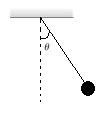

where the sphere is a puntiform particle with mass m, the line is a rigid and inextensible cable. The angle between the pendulum and the vertical line is $\theta$. The differential equation satisfied by this system (using Newton's second law of motion) is:

$m\frac{d^2x}{dt^2} = - mg\sin{\left(\frac{x}{L}\right)},$

where $x$ is the arc length of the pendulum trajectory. Note that this is a second order non-linear differential equation which are hard to solve analytically. So, to attempt a easier solution, we consider the small oscillations approximation: $\sin(\alpha) \approx \alpha$, for $\alpha << 1$ radians. In this approximation the differential equation is transformed to:

$\frac{d^2x}{dt^2} = - g\frac{x}{L}.$

The equation above can be calculated easily with the known methods of solving differential equations [1]. The solution has an important consequence: we can calculate the period of a pendulum, which is the time lapsed for a complete cycle. For the simple gravity pendulum it is given by:

$T_0 = 2\pi\sqrt{\frac{L}{g}}.$

But one can ask: if the pendulum does not satisfies the small oscillations approximation? So what happens if the angle $\theta > 1$ radians? In Sears and Zemansky, Young and Freedman, volume 2, Physics book [2] we found the answer: the period of oscillation is written as an infinite series of the angle:

\begin{split} T_n = 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{2^2}\sin^2{\left(\frac{\Theta}{2}\right)} +  \frac{1 . 3^2}{2^2 . 4^2}\sin^4{\left(\frac{\Theta}{2}\right)} + \cdots\right] \end{split}

Now $\Theta$ is the maximum angle of the pendulum. We consider in this notebook the approximation up to four order (named $T_4$, the 4th power of the sine function) because the next term is a 6th power of the sine function, which can be neglected. We compute the period of a pendulum with $L = 1$ m length and $g = 9,8$ m/s$^2$ for various angles starting from small values and going to higher ones. We also compare the calculations with the simple pendulum approximation.

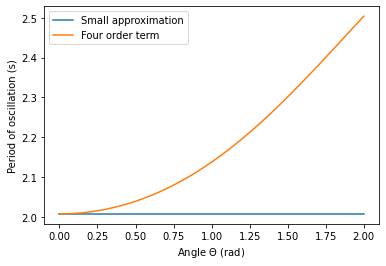

In [4]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
g = 9.8

small = open('Small period.txt','w')
four = open('Four order period.txt','w')

for i in range(0,201):
    Theta = 0.01*i
    Tsmall = 2*np.pi*np.sqrt(L/g)
    Tfour = 2*np.pi*np.sqrt(L/g)*(1 + (1/4)*(np.sin(Theta/2))**2 \
                                  + (9/64)*(np.sin(Theta/2))**4)
    four.write(str(Tfour))
    four.write('\n')
    small.write(str(Tsmall))
    small.write('\n')
    
small.close()
four.close()

small = np.loadtxt('Small period.txt')
four = np.loadtxt('Four order period.txt')

x = np.arange(0,2.01,0.01)
ysmall = small[:]
yfour = four[:]

plt.plot(x,ysmall,x,yfour)

plt.xlabel(r'Angle $\Theta$ (rad)')
plt.ylabel('Period of oscillation (s)')
plt.legend(['Small approximation','Four order term'],loc=0)

plt.show()

Note that both functions coincide for small values of the angle $\Theta$ and differ highly for greater values of the angle. We can plot the difference between both curves to understand for how big the angle shows a bad approximation. The next code do this calculation.

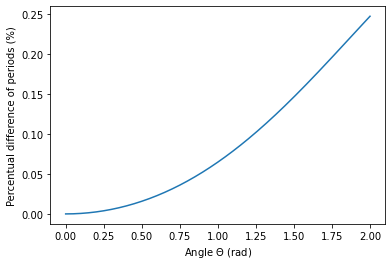

In [3]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
g = 9.8

dif = open('difference.txt','w')

for i in range(0,201):
    Theta = 0.01*i
    Tsmall = 2*np.pi*np.sqrt(L/g)
    Tfour = 2*np.pi*np.sqrt(L/g)*(1 + (1/4)*(np.sin(Theta/2))**2 \
                                  + (9/64)*(np.sin(Theta/2))**4)
    difference = abs(Tsmall-Tfour)/Tsmall
    dif.write(str(difference))
    dif.write('\n')
    
dif.close()

dif = np.loadtxt('difference.txt')

x = np.arange(0,2.01,0.01)
y = dif[:]

plt.plot(x,y)

plt.xlabel(r'Angle $\Theta$ (rad)')
plt.ylabel('Percentual difference of periods (%)')

plt.show()

The above picture show that for angles greater than $0.50$ radians the approximation starts turning bad. For example, near $\Theta = 0.75$ radians the percentual error is 5 %, approximately.

## Solving the transcendetal equation to find the bound value of angle

Suppose we want to find the angle that the approximation above is better than 1% accurate. It is means that the relative absolute difference: $|T_0 - T_4|/T_0 = 0.01$, where $T_0$ and $T_4$ are the equations mentioned before. Using the expressions derived before we find that the relative absolute difference is given by:

$\frac{1}{2^2}\sin^2{\left(\frac{\Theta}{2}\right)} +  \frac{1 . 3^2}{2^2 . 4^2}\sin^4{\left(\frac{\Theta}{2}\right)} = 0.01.$

This is a bisquared equation, which can be solved analytically using the formulas for second order equations. But, we want to solve this using regular methods of equation solving within Python. Next code shows this in more details.

In [2]:
import numpy as np
from scipy.optimize import root

def func(Theta, error):
    return (1/4)*(np.sin(Theta/2))**2 \
+ (9/64)*(np.sin(Theta/2))**4 - error

res = root(func, 0.01, args=(0.01)) #First the function, second the initial solution guess and finally the parameter error

print(res.x) #Result of the root finding

#Check the result
relativeerror = (1/4)*(np.sin(res.x/2))**2 
+ (9/64)*(np.sin(res.x/2))**4
print(relativeerror)

#Print the result in grads
print('The result in grads is: %s' % str(res.x*180/np.pi))

[0.39829584]
[0.00978459]
The result in grads is: [22.82067064]


So, as we can see in the code, the angle $\Theta = 0.39829584$ radians gives us a relative error of 1 % if we use the small approximation instead of the four order approximation for the period. This relative error is rather small and with a simple conversion we find that $\Theta = 22,8^{\circ}$. For angles smaller than this, the relative error is pretty small and can be neglected, showing that the small oscillations approximation works fine for $\Theta < 22,8^{\circ}$.

## Final remarks

In this notebook we briefly present the gravity pendulum and its small oscillations approximation. We show the results comparing the period of the pendulum for small approximations ($T_0$) and up to four order term ($T_4$). We showed that, for $\Theta < 22,8^{\circ}$ is a good approximation based on our calculations. We did not improved the terms on $T_n$ using up to fourth order only. Increasing more terms will only gives an result with a better accuracy in the third decimal case or less. We invite the reader to do that calculation for higher order terms. This can be achieved by some modifications of this notebook. The reader will see that the difference between our results and with a higher order terms is quite small.

But the most important feature of this notebook is not the result itself, but the construction. It shows to the reader that we can use Python as a simple programming languagen for many physics simulations and calculations. Here we used Python to solve and study a tipical mechanics problem that is not convered treated in the usual physics courses in the way did here and we wanted to cover the absence with this notebook. Hope you enjoyed it!

Any doubts, critics, suggestions or other informations email me: jvfrossard@gmail.com

See you in the next calculations!

## Bibliography

[1] BOYCE, William E.; DIPRIMA, Richard C.; MEADE, Douglas B. Elementary differential equations. John Wiley & Sons, 2017.

[2] YOUNG, Hugh D.; FREEDMAN, Roger A.; FORD, Albert Lewis. Sears and Zemansky's University Physics. Pearson Education, vol 2, 2006.